# Setup Environment

## Load Python Modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import os
from image import *
from CNN import *
from ViT import *
import util
from transformers import ViTImageProcessor, ViTForImageClassification
%load_ext autoreload
%autoreload 2

## Show NVIDIA GPU

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H200 (UUID: GPU-038bf561-fa9c-885e-57e5-ba12b762cb3d)


## Setup utility

In [3]:
util.setup_logger()

# Load and Process Dataset

## Load Dataset

In [4]:
folder_path = os.path.join(os.getenv("HOME"), "scratch")
# train_dataset = ImageDataset(os.path.join(folder_path, "train_80p.csv"), use_augmentation=False)
# valid_dataset = ImageDataset(os.path.join(folder_path, "validation_10p.csv"), use_augmentation=False)
# test_dataset  = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=False)

# folder_path = "../kaggle/input/ai-vs-human-generated-dateset/"
# train_dataset = ImageDataset(os.path.join(folder_path, "train.csv"), use_augmentation=True)
# valid_dataset = ImageDataset(os.path.join(folder_path, "train.csv"), use_augmentation=False)
# test_dataset  = ImageDataset(os.path.join(folder_path, "train.csv"), use_augmentation=False)
train_dataset = ImageDataset(os.path.join(folder_path, "train_80p.csv"), use_augmentation=True, model="ViT")
valid_dataset = ImageDataset(os.path.join(folder_path, "validation_10p.csv"), use_augmentation=True, model="ViT")
test_dataset  = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=True, model="ViT")

## Check Dataset

In [5]:
train_dataset.check()

There are 0 missing values
63960 images with label 0, and 63960 with label 1.
All filenames end with .jpg


## (Optional) Show image for verification

Label: 0, shape: torch.Size([3, 656, 768])


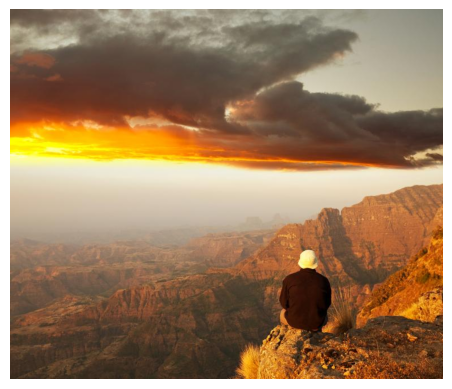

Label: 1, shape: torch.Size([3, 496, 768])


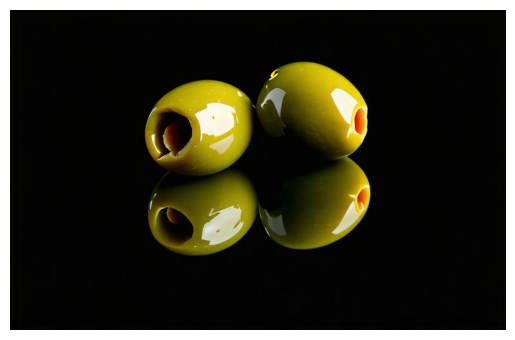

In [6]:
train_dataset.show_image()

## (Optional) Show normalized images

In [7]:
# dataset.show_image(transform=True)

# ViT Model

## Create Torch Data Loaders

In [6]:
# train_loader, valid_loader, test_loader = dataset.get_loaders()
batch_size = 64
train_loader = train_dataset.get_loader(batch_size=batch_size)
valid_loader = valid_dataset.get_loader(batch_size=batch_size)
test_loader  = test_dataset.get_loader(batch_size=batch_size)

## Check CUDA Availability

In [7]:
# "cuda" only when GPUs are available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Training Setup

In [8]:
_exp_name = "ViT_test"
# The number of training epochs and patience.
n_epochs = 100
patience = 30 # If no improvement in 'patience' epochs, early stop

# Initialize a model, and put it on the device specified.
model, train_losses, valid_losses = try_load_model_ViT(_exp_name)
if model == None:
    # Load feature extractor and model
    model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224').to(device)

feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-5)

[INFO] Model loaded from ViT_test_best.ckpt, loss loaded from ViT_test_loss.pkl, trained for 100 epochs


## Training

In [9]:
train_ViT(model, optimizer, train_loader, valid_loader, n_epochs=n_epochs, patience=patience,
            criterion=nn.CrossEntropyLoss(), train_losses = train_losses, valid_losses = valid_losses,
            prefix = _exp_name, feature_extractor=feature_extractor)

100%|██████████| 250/250 [01:48<00:00,  2.30it/s]


[ Valid | 001/100 ] loss = 0.19638, acc = 0.92128
[ Valid | 001/100 ] loss = 0.19638, acc = 0.92128 -> best


100%|██████████| 1999/1999 [17:16<00:00,  1.93it/s]


[ Train | 098/100 ] loss = 0.20072, acc = 0.91768


100%|██████████| 250/250 [01:39<00:00,  2.50it/s]


[ Valid | 098/100 ] loss = 0.22459, acc = 0.91098
[ Valid | 098/100 ] loss = 0.22459, acc = 0.91098
Epoch 98 duration: 1135.98 seconds


100%|██████████| 1999/1999 [17:13<00:00,  1.93it/s]


[ Train | 099/100 ] loss = 0.20183, acc = 0.91663


100%|██████████| 250/250 [01:44<00:00,  2.38it/s]


[ Valid | 099/100 ] loss = 0.20611, acc = 0.91576
[ Valid | 099/100 ] loss = 0.20611, acc = 0.91576
Epoch 99 duration: 1138.47 seconds


100%|██████████| 1999/1999 [17:28<00:00,  1.91it/s]


[ Train | 100/100 ] loss = 0.19914, acc = 0.91923


100%|██████████| 250/250 [01:39<00:00,  2.50it/s]


[ Valid | 100/100 ] loss = 0.20628, acc = 0.91447
[ Valid | 100/100 ] loss = 0.20628, acc = 0.91447
Epoch 100 duration: 1148.47 seconds


([0.49063370587409527,
  0.40959213646487513,
  0.3792048561954689,
  0.35906059975890053,
  0.3447200833796978,
  0.3243509747941474,
  0.32166217980890527,
  0.302518800467536,
  0.29554263774068906,
  0.28288819048257396,
  0.2776612275545152,
  0.26580108409973907,
  0.2623067096867163,
  0.2597047589298127,
  0.2549423675400845,
  0.2518435062513523,
  0.24783794048534386,
  0.24530351732956762,
  0.24378962517008299,
  0.24134181668723803,
  0.24016763255365375,
  0.2385312793864913,
  0.23828246980801174,
  0.23376608863957468,
  0.2320998577757917,
  0.23058912277840388,
  0.2293093139850807,
  0.23642530934833897,
  0.2424317621413978,
  0.23683973895632784,
  0.23173007647459837,
  0.2300573754412732,
  0.22832170150812534,
  0.22730207919753928,
  0.22706574462484633,
  0.22519881248831927,
  0.22495002418629761,
  0.22374400772292236,
  0.22393085253334094,
  0.22029300719283412,
  0.21982170209445137,
  0.21872384267756198,
  0.21709914407457573,
  0.21884630770683886,
  0

# Testing the Model

## Load the model

[INFO] Model loaded from ViT_test_best.ckpt, loss loaded from ViT_test_loss.pkl, trained for 100 epochs


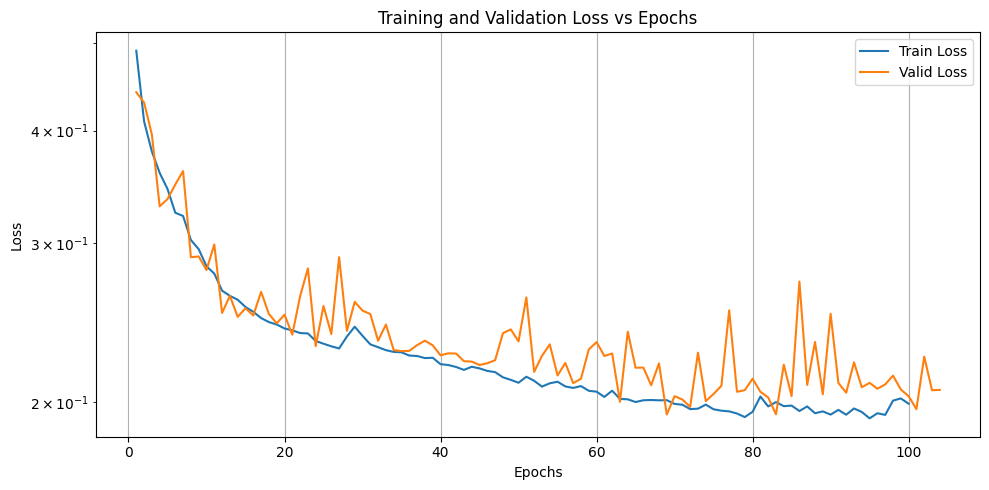

In [9]:
# model = load_model(f"{_exp_name}_best.ckpt")
model, train_losses, valid_losses = try_load_model_ViT(_exp_name)
feature_extractor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
plot_losses(train_losses, valid_losses)

## Evaluation

100%|██████████| 250/250 [03:14<00:00,  1.29it/s]


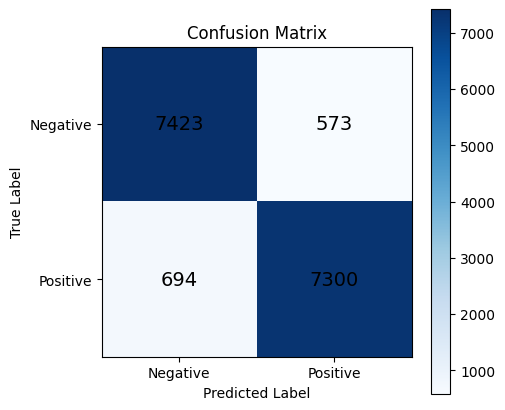

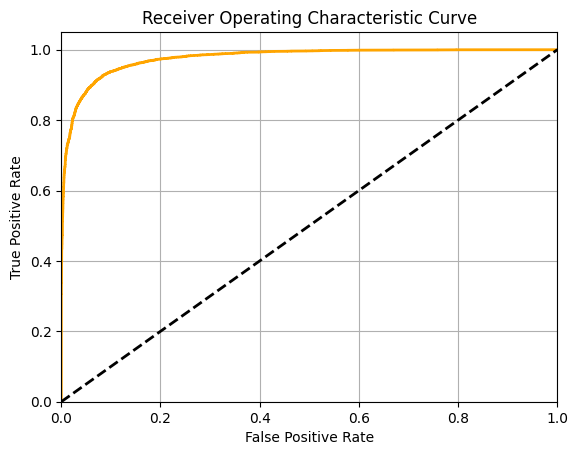

Test Accuracy: 0.9208
F1 Score: 0.9201
F2 Score: 0.9160
AUC: 0.9764


(np.float64(0.9207629768605379),
 np.float64(0.9201487363710846),
 np.float64(0.9159577404702752),
 np.float64(0.9763683912258857))

In [10]:
evaluate_model_ViT(model, test_loader, feature_extractor)